## Section C : Service Efficiency Analysis

### Data Loading:

In [109]:
#!pip install sqlite3
import sqlite3
import pandas as pd
import numpy as np

conn = sqlite3.connect('queue_system_sqlite3.db')
cursor_obj = conn.cursor()

For analyzing service efficiency only the `calls` table is required. 

In [110]:
df = pd.read_sql_query("SELECT users.name as agent_name, calls.* FROM calls, users WHERE calls.user_id = users.id;", conn)
df.head()

,agent_name,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at,call_status_id
0,Nandu Acharaya,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,1.0
1,Nandu Acharaya,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,1.0
2,Nandu Acharaya,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,None,00:00:13,None,None,2024-01-25 18:34:53,2024-01-25 18:34:53,NaN
3,Nandu Acharaya,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,1.0
4,Nandu Acharaya,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,2024-01-25 18:35:58,2024-01-25 18:37:00,1.0


### Data Profiling with Descriptive Statistics

In [111]:
print("Data type of each column:")
print(df.info())

Data type of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   agent_name        3354 non-null   object 
 1   id                3354 non-null   int64  
 2   queue_id          3354 non-null   int64  
 3   service_id        3354 non-null   int64  
 4   counter_id        3354 non-null   int64  
 5   user_id           3354 non-null   int64  
 6   token_letter      3354 non-null   object 
 7   token_number      3354 non-null   int64  
 8   called_date       3354 non-null   object 
 9   started_at        3354 non-null   object 
 10  ended_at          3335 non-null   object 
 11  waiting_time      3354 non-null   object 
 12  served_time       2737 non-null   object 
 13  turn_around_time  2737 non-null   object 
 14  created_at        3354 non-null   object 
 15  updated_at        3354 non-null   object 
 16  call_status_id  

The values missing in `ended_at`, `served_time`, `turn_around_time` and `call_status_id` are justified.

In [112]:
print(df['call_status_id'].value_counts())

call_status_id
1.0    2737
2.0     598
Name: count, dtype: int64


Here, the <mark>`call_status_id` should be converted to `int`</mark> and all the <mark>date and time related attributes which have been assigned type `object` should also be converted to `datetime`</mark>.

In [113]:
print("Summery Statistics:")
print(df.describe())

Summery Statistics:
                id     queue_id   service_id   counter_id      user_id  \
count  3354.000000  3354.000000  3354.000000  3354.000000  3354.000000   
mean   1984.522660  1736.265653     1.598986     5.233154     8.946333   
std    1135.376866   973.158385     0.619216     2.916252     3.247718   
min      28.000000    45.000000     1.000000     1.000000     2.000000   
25%    1011.500000   899.250000     1.000000     3.000000     6.000000   
50%    1946.500000  1737.500000     2.000000     5.000000     9.000000   
75%    2960.500000  2578.750000     2.000000     8.000000    12.000000   
max    4021.000000  3417.000000     3.000000    10.000000    15.000000   

       token_number  call_status_id  
count   3354.000000     3335.000000  
mean      41.959451        1.179310  
std       28.310359        0.383669  
min        1.000000        1.000000  
25%       17.000000        1.000000  
50%       39.500000        1.000000  
75%       64.000000        1.000000  
max      

In [114]:
df.describe(include='object')

,agent_name,token_letter,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at
count,3354,3354,3354,3354,3335,3354,2737,2737,3354,3354
unique,13,3,20,3346,3327,2794,1269,2399,3350,3346
top,Mahima Kalikote,W,2024-02-16,2024-02-07 17:52:04,2024-02-16 12:04:20,00:26:21,00:00:02,00:35:38,2024-01-28 15:43:48,2024-02-16 12:04:20
freq,432,1585,219,2,2,7,29,4,2,2


## Data Preprocessing

In [115]:
df.replace("?", np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

df['call_status_id'] = df['call_status_id'].replace(np.nan, 0) # For ease of relabeling.

### Checking for nan values

In [116]:
df.isna().any() #Here, `any` evaluates each element to determine if the overall value is True or False.

agent_name          False
id                  False
queue_id            False
service_id          False
counter_id          False
user_id             False
token_letter        False
token_number        False
called_date         False
started_at          False
ended_at             True
waiting_time        False
served_time          True
turn_around_time     True
created_at          False
updated_at          False
call_status_id      False
dtype: bool

As mentioned before values missing in `ended_at`, `served_time` and `turn_around_time` are justified.

### Checking for duplicates

In [117]:
df.duplicated(subset=None).any()

np.False_

### Correcting data formats

In [118]:
df[['call_status_id']] = df[['call_status_id']].astype('int')

df['called_date'] = pd.to_datetime(df['called_date'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
# df['waiting_time'] = pd.to_datetime(df['waiting_time'])
# df['served_time'] = pd.to_datetime(df['served_time'])
# df['turn_around_time'] = pd.to_datetime(df['turn_around_time'])

df.dtypes

agent_name                  object
id                           int64
queue_id                     int64
service_id                   int64
counter_id                   int64
user_id                      int64
token_letter                object
token_number                 int64
called_date         datetime64[ns]
started_at          datetime64[ns]
ended_at            datetime64[ns]
waiting_time                object
served_time                 object
turn_around_time            object
created_at                  object
updated_at                  object
call_status_id               int64
dtype: object

Here, `waiting_time`, `served_time` and `turn_around_time` was left as is because they contain only time data and `served_time` and `turn_around_time` have np.nan data which is useful. These variables will later be standardized instead.

#### Relabeling for making visualization more comprehensive

In [119]:
df['call_status_id'] = df['call_status_id'].replace({0: 'Serving/Unresolved', 1: 'Served', 2: 'No Show'})
df['service_id'] = df['service_id'].replace({1: 'WIS', 2: 'New Registration', 3: 'Training'})

### Removing unnecessary attributes

In [120]:
df.drop(['id', 'user_id', 'queue_id', 'token_letter', 'token_number','created_at','updated_at'], axis=1, inplace=True)
df.head()

,agent_name,service_id,counter_id,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_status_id
0,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,Served
1,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,Served
2,Nandu Acharaya,New Registration,2,2024-01-25,2024-01-25 18:34:53,NaT,00:00:13,None,None,Serving/Unresolved
3,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,Served
4,Nandu Acharaya,Training,3,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,Served


### Standardization

In order to make comparison between `waiting_time`, `served_time` and `turn_around_time` they will all be represented in terms of minutes for ease of use.

In [121]:
def quantify_period(period):
  if(period is None):
    return 0
  time = period.split(':')
  period_in_min = (int(time[0]) * 60) + int(time[1]) + (int(time[2])/60)
  return period_in_min

In [122]:
df['waiting_time'] = df['waiting_time'].apply(quantify_period)
df['served_time'] = df['served_time'].apply(quantify_period)
df['turn_around_time'] = df['turn_around_time'].apply(quantify_period)
df.head()

,agent_name,service_id,counter_id,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_status_id
0,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,6.750000,8.016667,14.766667,Served
1,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,13.650000,0.133333,13.783333,Served
2,Nandu Acharaya,New Registration,2,2024-01-25,2024-01-25 18:34:53,NaT,0.216667,0.000000,0.000000,Serving/Unresolved
3,Nandu Acharaya,WIS,2,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,10.283333,0.066667,10.350000,Served
4,Nandu Acharaya,Training,3,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,0.483333,1.033333,1.516667,Served


In [123]:
df.describe()

,counter_id,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time
count,3354.000000,3354,3354,3335,3354.000000,3354.000000,3354.000000
mean,5.233154,2024-02-06 13:03:58.282647808,2024-02-07 03:09:11.555754240,2024-02-07 03:54:37.490254592,70.138303,9.957369,66.263427
min,1.000000,2024-01-25 00:00:00,2024-01-25 18:26:13,2024-01-25 18:34:14,0.000000,0.000000,0.000000
25%,3.000000,2024-02-01 00:00:00,2024-02-01 11:31:20.500000,2024-02-01 11:43:21,29.520833,2.237500,20.358333
50%,5.000000,2024-02-07 00:00:00,2024-02-07 15:27:28,2024-02-07 15:58:24,62.708333,8.808333,56.483333
75%,8.000000,2024-02-12 00:00:00,2024-02-12 14:44:23.500000,2024-02-12 14:57:00.500000,100.525000,13.916667,102.108333
max,10.000000,2024-02-16 00:00:00,2024-02-16 17:34:58,2024-02-16 17:53:11,295.216667,183.733333,318.350000
std,2.916252,NaN,NaN,NaN,49.285201,11.585064,55.867115


Here, we can see that <mark>`waiting_time`, `served_time` and `turn_around_time` all have outliers</mark>.

### Handling Outliers

In [124]:
def handleOutlier(column):
  print("\nFor "+column+":")
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1
  lowerBound = q1 - 1.5 * IQR
  upperBound = q3 + 1.5 * IQR 
  
  outlier_index=[]
  for i in df.index:
    if df[column][i] is not np.nan:
      if (df[column][i] < lowerBound) or (df[column][i] > upperBound):
        outlier_index.append(i)
  
  print("Number of Outliers:",len(outlier_index))
  print("No. of rows before removing outliers",df.shape[0])
  df.drop(outlier_index, inplace=True)
  print("No. of rows after removing outliers",df.shape[0])

#### For `waiting_time`

<Axes: title={'center': 'Box whisker plot with Outliers'}>

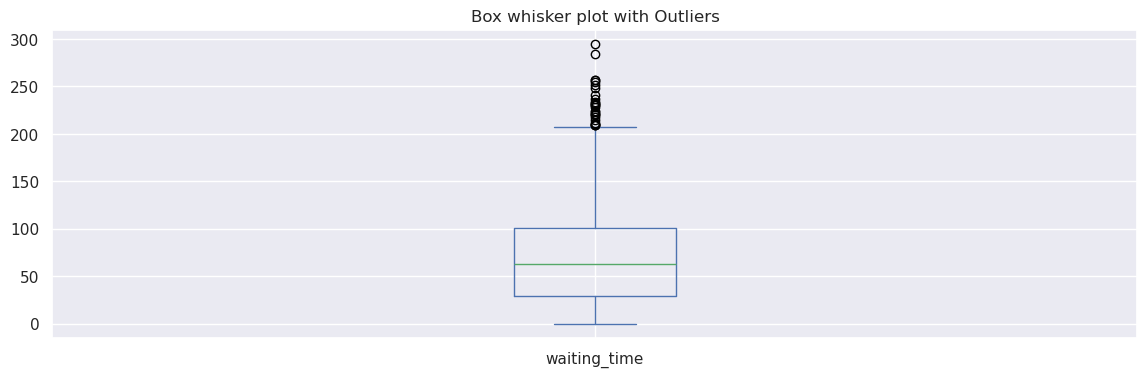

In [125]:
df['waiting_time'].plot(kind='box', title="Box whisker plot with Outliers")

In [126]:
handleOutlier('waiting_time')


For waiting_time:
Number of Outliers: 27
No. of rows before removing outliers 3354
No. of rows after removing outliers 3327


#### For `served_time`

<Axes: title={'center': 'Box whisker plot with Outliers'}>

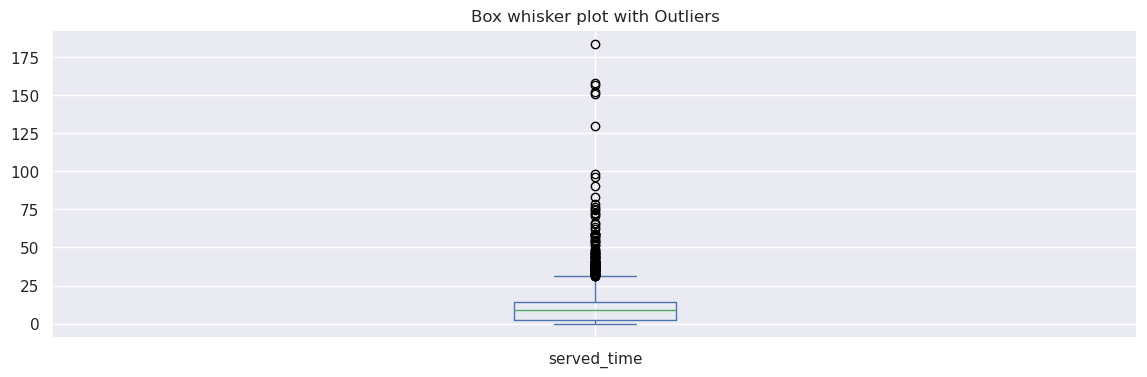

In [127]:
df['served_time'].plot(kind='box', title="Box whisker plot with Outliers")

In [128]:
handleOutlier('served_time')


For served_time:
Number of Outliers: 105
No. of rows before removing outliers 3327
No. of rows after removing outliers 3222


#### For `turn_around_time`

<Axes: title={'center': 'Box whisker plot with Outliers'}>

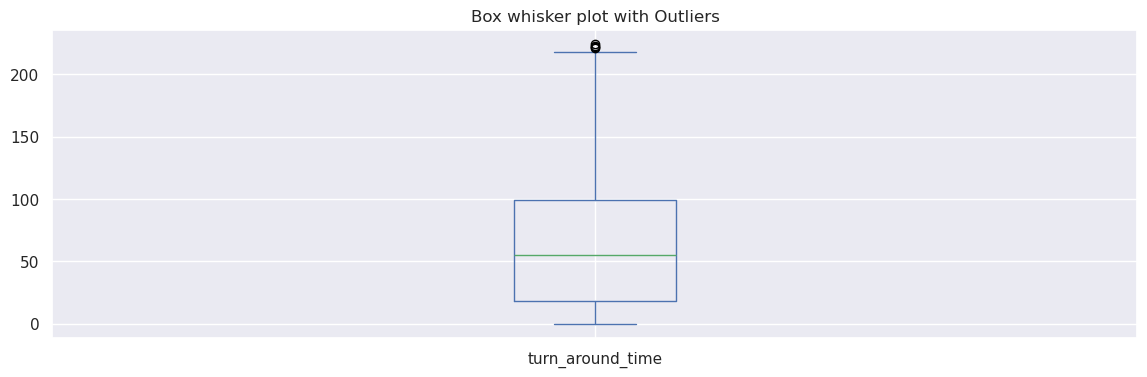

In [129]:
df['turn_around_time'].plot(kind='box', title="Box whisker plot with Outliers")

In [130]:
handleOutlier('turn_around_time')


For turn_around_time:
Number of Outliers: 4
No. of rows before removing outliers 3222
No. of rows after removing outliers 3218


In [131]:
df.shape

(3218, 10)

## Exploratory Data Analysis with Visualization

In [132]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Call Status

The one variable which can be considered <mark>a direct indication of service efficiency is the `call_status_id`</mark> as it tells us if proper service was given or not.

[Text(0.5, 1.0, 'Different types of Call Status'),
 Text(0.5, 0, 'Types of Call Status')]

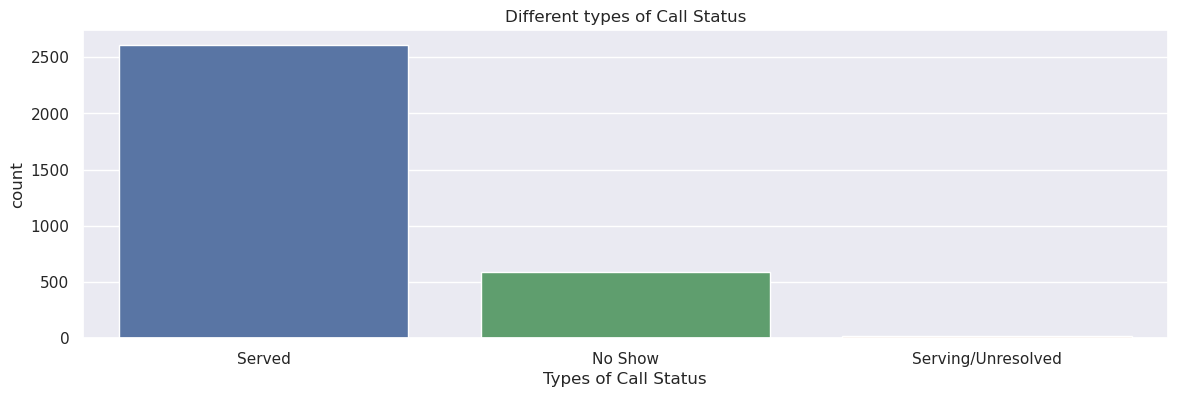

In [133]:
sns.countplot(x='call_status_id', data=df, hue='call_status_id', order=df['call_status_id'].value_counts().index).set(title="Different types of Call Status", xlabel='Types of Call Status')

So, the <mark>vast majority of calls were properly served, a minority of calls were dropped because the clients didn't show up and a negligible amount of calls were unresolved</mark>.  

### Service

[Text(0.5, 1.0, 'Different types of services'),
 Text(0.5, 0, 'Types of Services')]

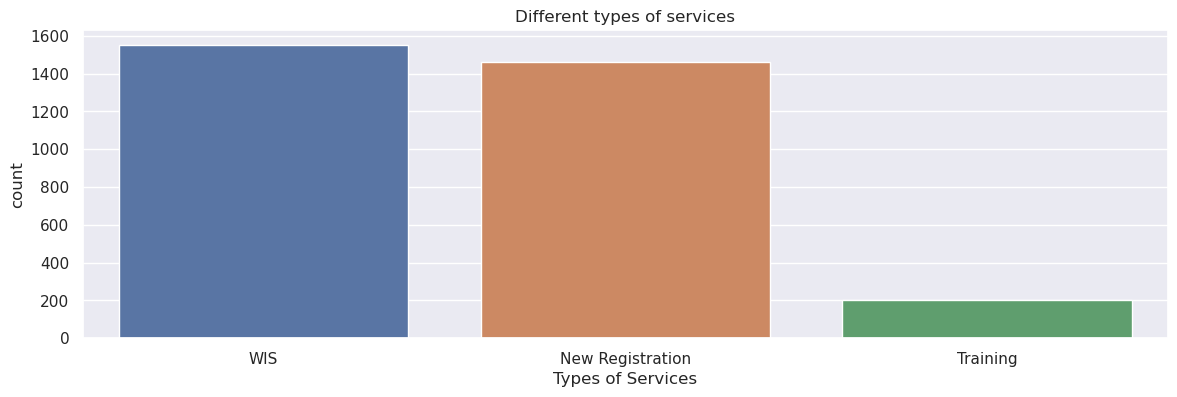

In [134]:
sns.countplot(x='service_id', data=df, hue='service_id').set(title="Different types of services", xlabel='Types of Services')

The <mark>training service is requested the least whereas most people call requesting for WIS primarily and then New Registration</mark>.

### Service vs Call Status 

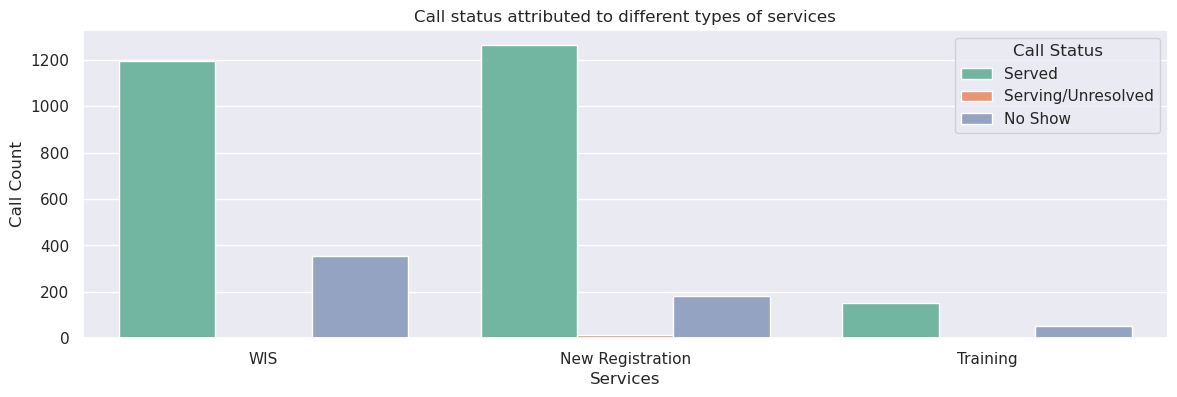

In [135]:
sns.countplot(x='service_id', hue='call_status_id', data=df, palette='Set2', order=df['service_id'].value_counts().index)

plt.title('Call status attributed to different types of services')
plt.xlabel('Services')
plt.ylabel('Call Count')

plt.legend(title='Call Status', loc='upper right')

plt.show()

From this diagram we can see that 
 - While higher number of calls are made for WIS compared to for New Registration, <mark>the calls for New Registration have been properly solved more often i.e. lesser No show cases</mark>. 
 - <mark>Unresolved cases are concentrated in New Registration service</mark>  
 - <mark>A higher proportion of clients don't show up for training calls compared to the other service types</mark>.

### Counters

[Text(0.5, 1.0, 'Different types of counters'),
 Text(0.5, 0, 'Types of Services')]

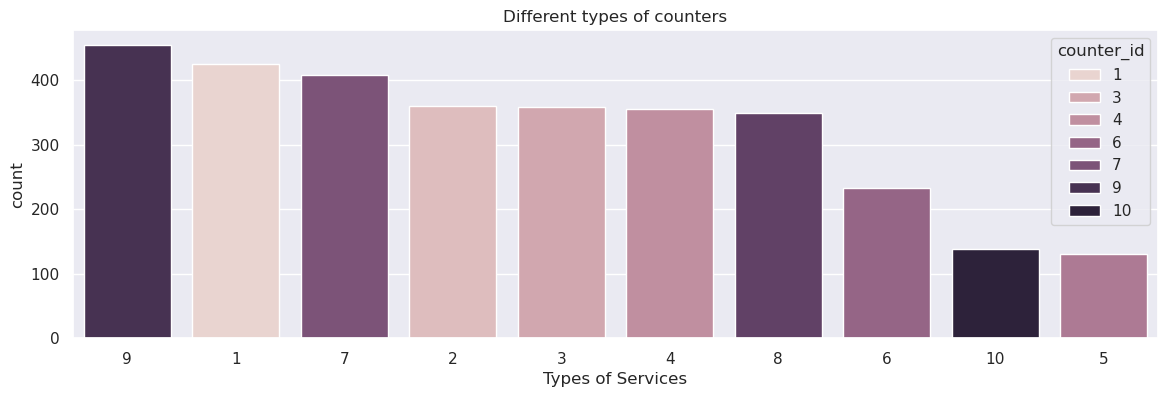

In [136]:
sns.countplot(x='counter_id', data=df, hue='counter_id', order=df['counter_id'].value_counts().index).set(title="Different types of counters", xlabel='Types of Services')

So, <mark>the 9th counter is used by most clients where as 5th counter is used the least</mark>.

### Correlation between `waiting_time`, `served_time` and `turn_around_time`

Besides `waiting_time`, `served_time` and `turn_around_time`, all other variables are categorical so calculating correlation is useless for them.

In [137]:
df[['waiting_time','served_time','turn_around_time']].corr()

,waiting_time,served_time,turn_around_time
waiting_time,1.000000,0.098927,0.704055
served_time,0.098927,1.000000,0.534165
turn_around_time,0.704055,0.534165,1.000000


#### `waiting_time` vs `turn_around_time`

In [138]:
pearson_coef, p_value = stats.pearsonr(df['waiting_time'], df['turn_around_time'])
print("For waiting_time and turn_around_time:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)

For waiting_time and turn_around_time:
The Pearson Correlation Coefficient is 0.7040551396791472  with a P-value of 0.0


As, P-value is <0.001 correlation of 0.704 between `waiting_time` and `turn_around_time` is highly significant. 

<Axes: title={'center': 'waiting_time vs turn_around_time in Years'}, xlabel='waiting_time', ylabel='turn_around_time'>

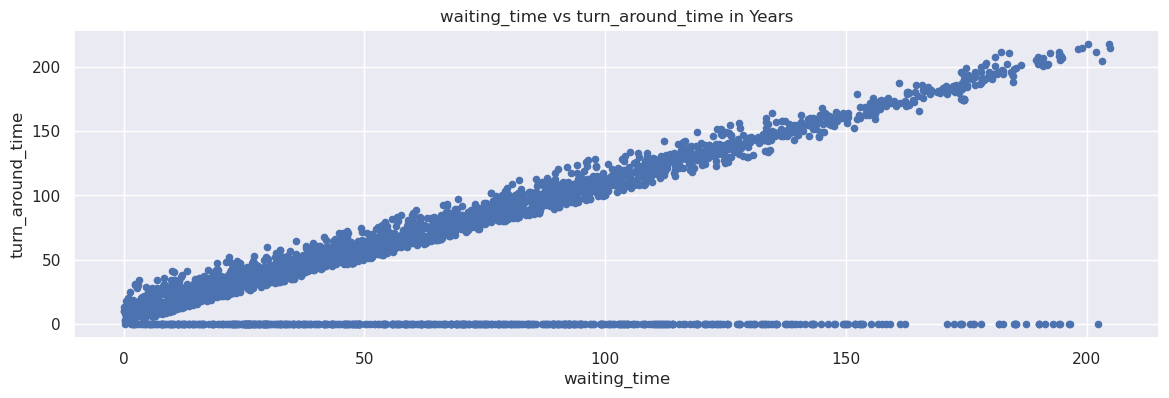

In [139]:
df.plot(kind='scatter', x="waiting_time", y="turn_around_time", title="waiting_time vs turn_around_time in Years")

The scatter chart clearly shows a <mark>strong positive corelation between the two variables</mark>. The horizontal line can be ignored as it's due to the empty turn_around_time which weren't recorded.

#### `served_time` vs `turn_around_time`

In [140]:
pearson_coef, p_value = stats.pearsonr(df['served_time'], df['turn_around_time'])
print("For served_time and turn_around_time:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value) 

For served_time and turn_around_time:
The Pearson Correlation Coefficient is 0.5341654765826406  with a P-value of 6.595825687272428e-237


As, P-value is <0.001 correlation of 0.534 between `served_time` and `turn_around_time` is highly significant. 

<Axes: title={'center': 'served_time vs turn_around_time in Years'}, xlabel='served_time', ylabel='turn_around_time'>

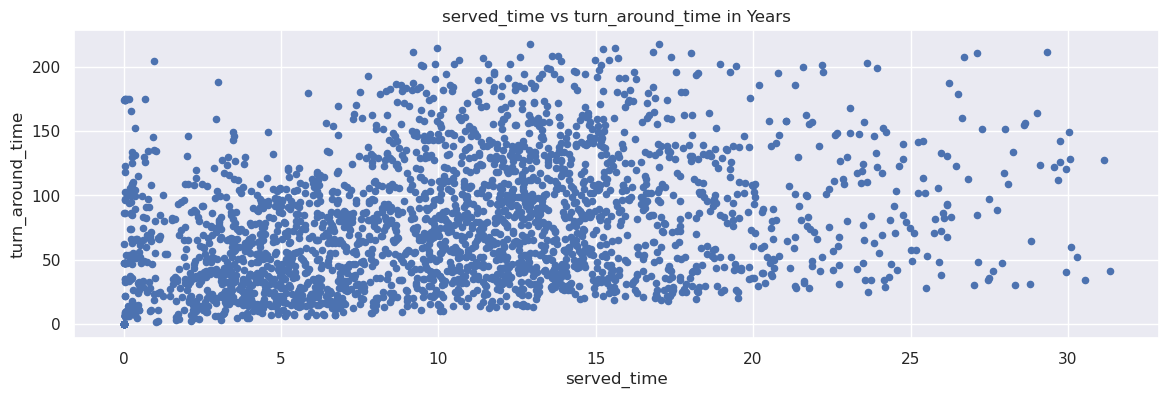

In [141]:
df.plot(kind='scatter', x="served_time", y="turn_around_time", title="served_time vs turn_around_time in Years")

The scatter chart reflects the <mark>weak positive relation between the `served_time` and `turn_around_time`</mark>.

#### `waiting_time` vs `served_time`

In [142]:
pearson_coef, p_value = stats.pearsonr(df['served_time'], df['waiting_time'])
print("For served_time and waiting_time:\nThe Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value) 

For served_time and waiting_time:
The Pearson Correlation Coefficient is 0.09892736953429755  with a P-value of 1.8711305447635137e-08


So, <mark>`waiting_time` and `served_time` has a very weak linear relationship but it's highly significant</mark>.

#### Comparison in effects of Waiting time and Served time on Turn-Around time

In [143]:
print("Mean values:")
df[['waiting_time','served_time']].mean()

Mean values:


waiting_time    68.761612
served_time      8.559923
dtype: float64

The `turn_around_time` is the sum of `waiting_time` and `served_time` so they obviously have significant positive relation but <mark>the reason `waiting_time` contributes so much more to `turn_around_time` compared to `served_time` is due to its astronomically greater value in average</mark>. So, `waiting_time` can be used in place of `turn_around_time`.

### Waiting time vs Call Status

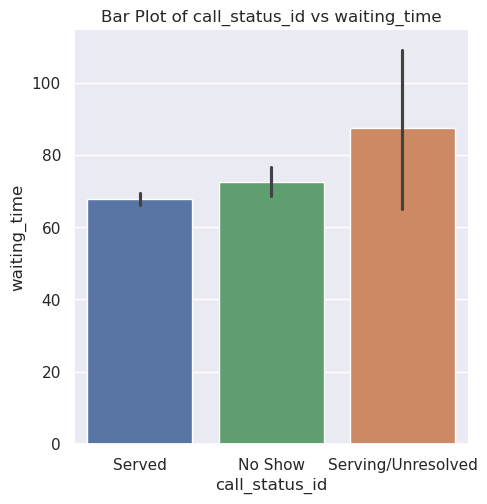

In [144]:
sns.catplot(data=df, x="call_status_id", y="waiting_time" , hue='call_status_id', kind="bar", order=df['call_status_id'].value_counts().index).set(title="Bar Plot of call_status_id vs waiting_time")

Thus, as <mark>waiting time increases the probability of the call being well served decreases</mark>.

### Waiting time vs Service

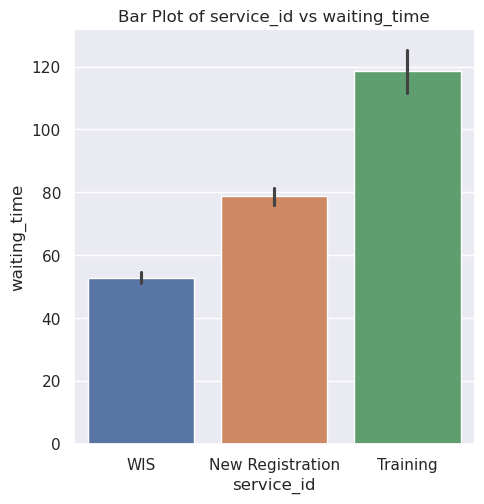

In [145]:
sns.catplot(data=df, x="service_id", y="waiting_time" , kind="bar", hue='service_id', order=df['service_id'].value_counts().index).set(title="Bar Plot of service_id vs waiting_time")

<mark>The waiting time for various services may be negatively related to the number of calls made for the service and vice-versa</mark>.

### Called date 

In [146]:
counts_per_called_date = df.groupby('called_date').size().reset_index(name='Count')

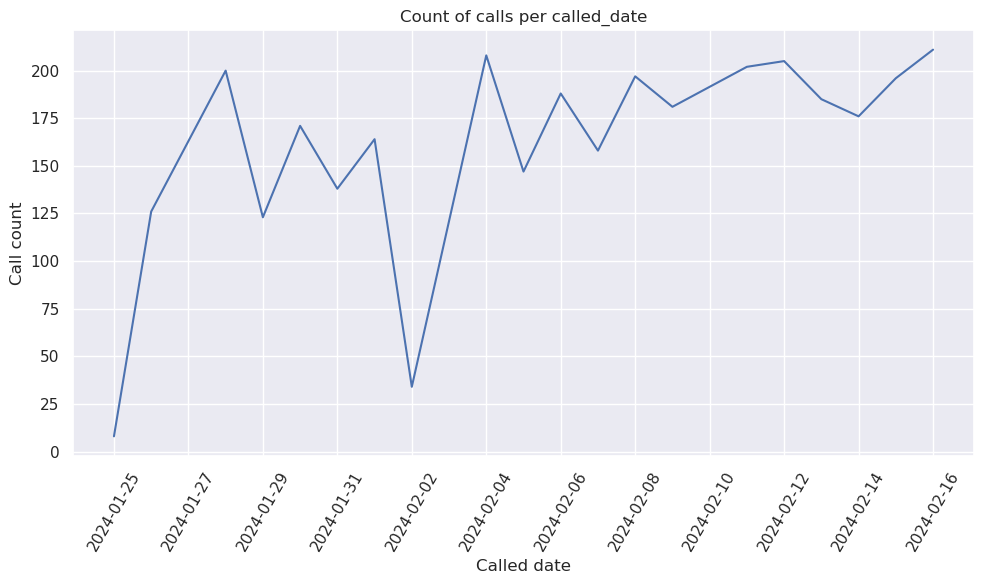

In [147]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='called_date', y='Count', data=counts_per_called_date, ax=ax)

plt.title('Count of calls per called_date')
plt.xlabel('Called date')
plt.ylabel('Call count')

# Set the x-axis locator to show all dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=60)
plt.tight_layout() 

plt.show()

The number of calls were on a rise on the month of February with calls reaching its peak on the last recoded day.   

### Average number of calls per hour

In [148]:
# Extract the hour from the datetime
df['hour'] = df['started_at'].dt.hour

df_hr = df.groupby('hour').size().reset_index(name='count')
df_hr

,hour,count
0,9,99
1,10,287
2,11,333
3,12,283
4,13,492
5,14,502
6,15,468
7,16,414
8,17,296
9,18,42


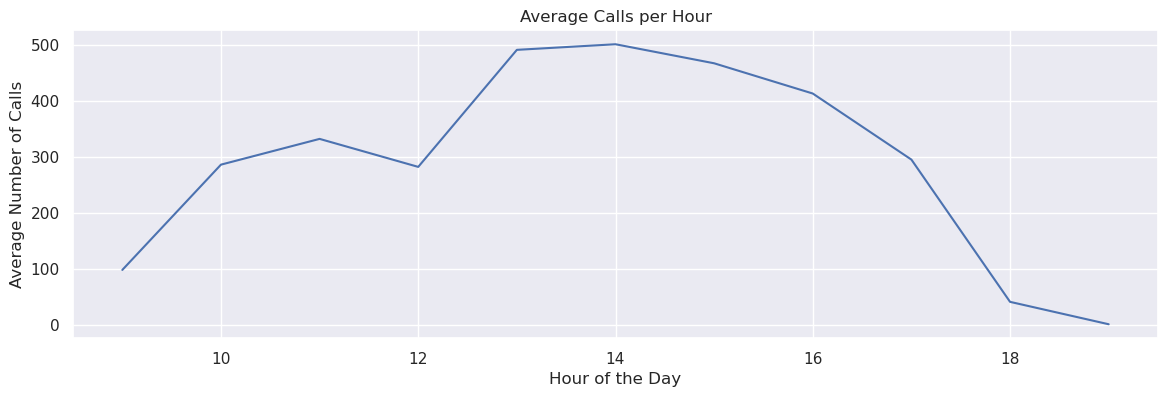

In [149]:
sns.lineplot(x='hour', y='count', data=df_hr)

plt.title('Average Calls per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Calls')

plt.show()

We can see that <mark>2 PM is the peak hour when most number calls are received in average each day</mark>.  

### Best Agent

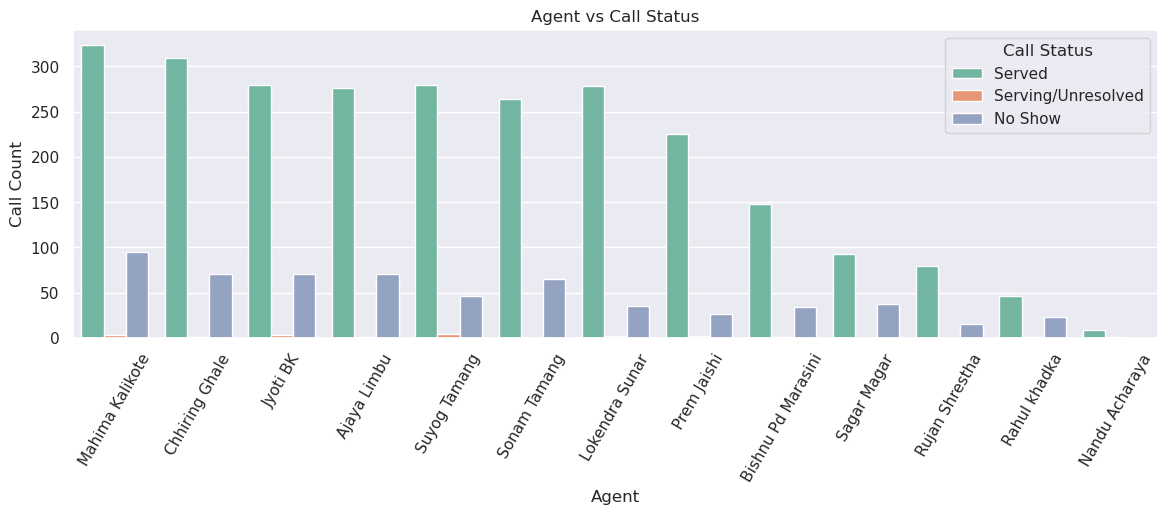

In [150]:
sns.countplot(x='agent_name', hue='call_status_id', data=df, palette='Set2', order=df['agent_name'].value_counts().index)

sns.set(rc={'figure.figsize': (14, 4)})

plt.title('Agent vs Call Status')
plt.xlabel('Agent')
plt.ylabel('Call Count')
plt.xticks(rotation=60)

plt.legend(title='Call Status', loc='upper right')

plt.show()

While Mahima Kalikote takes the most number of calls, the no show calls and unresolved calls attributed to her/him are also very high. So, <mark>Chhiring Ghale is the best agent</mark> as s/he takes almost the same amount of calls and also has low no show and unresolved calls attributed to them.

### Agent vs Services

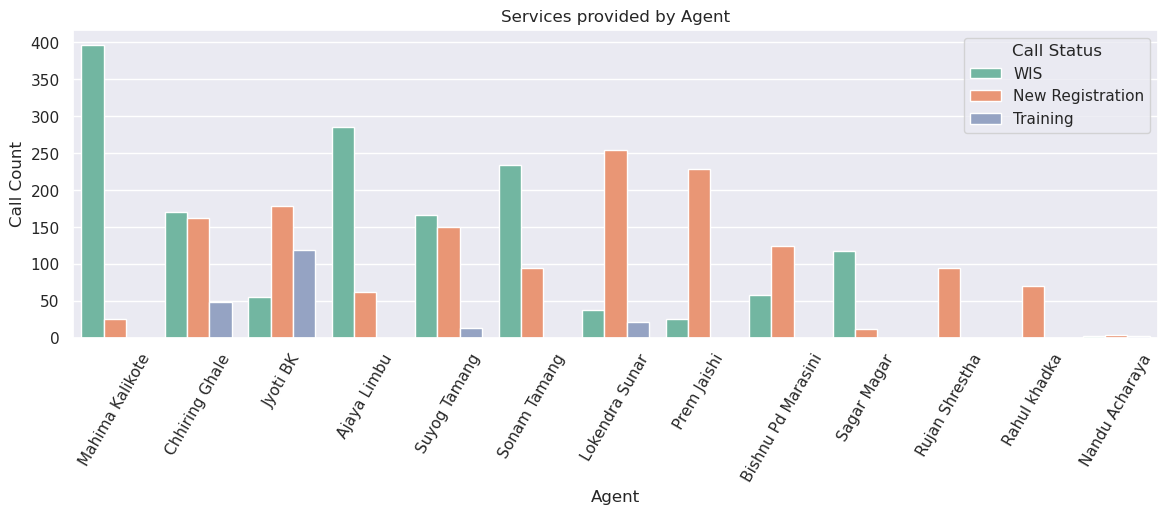

In [151]:
sns.countplot(x='agent_name', hue='service_id', data=df, palette='Set2', order=df['agent_name'].value_counts().index)

sns.set(rc={'figure.figsize': (16, 4)})

plt.title('Services provided by Agent')
plt.xlabel('Agent')
plt.ylabel('Call Count')
plt.xticks(rotation=60)

plt.legend(title='Call Status', loc='upper right')

plt.show()

We already know New Registration service are more likely to be properly served, so <mark>Chhiring Ghales habit of providing WIS and New Registration services in almost equal distribution is most likely the reason for the low number no show</mark>. This can also be seen in case of other agents like Lokendra Sunar, Prem Jaishi, etc.

## Recommendations

For increasing the productivity of the Call Service Operation, I would recommend taking the following steps.
1.	Shifting traffic to under utilized counters 5, 10 and 6.
2.	Reducing the waiting time will result in more well served calls. It will also increase the number of calls i.e. attract more customers.
3.	Shift focus away from Training services as it has a high proportion of cases where clients will not show up. It also has a very long waiting time which will negatively impact customer’s experience.
4.	As number of calls seem to be growing with each passing day, expand the operation by hiring more agents.
5.	2 PM is peak hour so start ramping up performance from 12 PM and reduce performance from 4 PM. The 4-hour time window between 12 PM and 4 PM must be prioritized.
6.	Tell agents to learn from the best and promote agents to equally provide WIS and New Registration services to minimize no show cases.
